## Business Understanding
Hello guys, hope everyone is staying home and safe. As the covid-19 outbreak impacted the world in so many ways, I decided to do an analysis on COVID-19 transmission rate around the globe

I will answer the three question of interest mentioned below:

Q1: What is the trend of confirmed and recovered cases of COVID-19？

Q2: How land temperature affected the transmission and progression of spread of COVID-19?

Q3: How many confirmed cases in different countries based on the average temperature?


In [17]:
#import all required libraries
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
import plotly.offline as pf
import plotly.express as px
import warnings

## Preaparing data following CRISP-DM Process

In [18]:
#Reading the datasets
raw_df = pd.read_csv('Datasets/corona-virus-report/covid_19_clean_complete.csv',
                    parse_dates=['Date'])
raw_df.head()

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596 2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218 2020-01-22          0   
4            NaN         Angola -11.2027  17.8739 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

## Handling of categorical and missign values

In [19]:
#Considering all types of cases
all_cases = ['Confirmed', 'Active', 'Recovered', 'Deaths']
# Defining Active Case: Active Case = confirmed - deaths - recovered
raw_df['Active'] = raw_df['Confirmed'] - raw_df['Deaths'] - raw_df['Recovered']

# Renaming Mainland china as China in the data table
raw_df['Country/Region'] = raw_df['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
raw_df[['Province/State']] = raw_df[['Province/State']].fillna('')
raw_df[all_cases] = raw_df[all_cases].fillna(0)

# new raw data to extract the latest no of cases till now
raw_df_new = raw_df[raw_df['Date'] == max(raw_df['Date'])].reset_index()

# Grouping the no of cases based on region/countries from new raw data
raw_df_new_grouped = raw_df_new.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

## Analysis, Modeling and Visualization

In [35]:
#Here we take sum of confirmed, deaths, recovered, active cases and printing the latest data
temp_df = raw_df.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()
temp_df = raw_df.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_df = temp_df[temp_df['Date']==max(temp_df['Date'])].reset_index(drop=True)
temp_df.style.background_gradient(cmap='Pastel2')

In [21]:
#Countries ranked by confirmed cases
temp_df_new = raw_df_new_grouped.sort_values(by='Confirmed', ascending=False)
temp_df_new = temp_df_new.reset_index(drop=True)
temp_df_new.style.background_gradient(cmap='plasma')

## All the analysis will be based on the above table which is already cleaned and handled properly

In [22]:
temp_df_new.head()

Country/Region  Confirmed  Deaths  Recovered   Active
0              US    1283929   77180     198993  1007756
1           Spain     222857   26299     131148    65410
2           Italy     217185   30201      99023    87961
3  United Kingdom     212629   31316        997   180316
4          Russia     187859    1723      26608   159528

## Answers to the questions of interest

## Q1 What is the trend of confirmed and recovered cases of COVID-19？

In [23]:
#Plotting trend of confirmed and recovered cases
fig = go.Figure()

#trace for confirmed cases
fig.add_trace(go.Scatter(
                x=raw_df.Date,
                y=raw_df['Confirmed'],
                name="Confirmed",
                line_color='firebrick',
                opacity=0.8))

#trace for recovered cases
fig.add_trace(go.Scatter(
                x=raw_df.Date,
                y=raw_df['Recovered'],
                name="Recovered",
                line_color='yellow',
                opacity=0.8))
#time-range slider plot using plotly
fig.update_layout(title_text='Confirmed vs Recovered with time-range slider',
                  xaxis_rangeslider_visible=True)
py.offline.iplot(fig)

### From the above time-range slider the below insights are observed
*  Confirmed cases increasing steeply between 1st week of Feb to 3rd week of Feb
*  Recovered cases increasing steeply from 4th week of March
*  Rate of increase of confirmed cases significantly drops from March 1st week



## Q2 How land temperature affected the transmission and progression of spread of COVID-19?

In [24]:
# Calculating the count of confirmed cases by country

countries = np.unique(temp_df_new['Country/Region'])
mean_conf = []
for country in countries:
    mean_conf.append(temp_df_new[temp_df_new['Country/Region'] == country]['Confirmed'].sum())
    
# dataframe for geomappiing confirmed cases
    data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_conf,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Count')
            )
       ]
    
# Geomaping visualisation of confirmed cases
    layout = dict(
    title = 'COVID-19 Confirmed Cases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,183,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

#plot for geo map
fig = dict(data=data, layout=layout)
pf.iplot(fig, validate=False, filename='worldmap')

* Confirmed cases globaly,  this clearly specifies all the regions/countries which are affected based on the 
  scale on the right side of the geo plot

In [25]:
#readling new data set for global temperature mapping
global_df_temp = pd.read_csv("Datasets/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")
global_df_temp.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [26]:
## Removing the duplicates
global_df_temp_clear = global_df_temp[~global_df_temp['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_df_temp_clear = global_df_temp_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Calculating average temperature by country

countries = np.unique(global_df_temp_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_df_temp_clear[global_df_temp_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

# dataframe for geomappiing confirmed cases
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

# Geomaping visualisation of confirmed cases
layout = dict(
    title = 'AVERAGE LAND TEMPERATURES',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,183,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

#plot for geo map
fig = dict(data=data, layout=layout)
pf.iplot(fig, validate=False, filename='worldmap')

* The above geo plot shows the average land temperature, we can see that regions with temperature range of
  5 - 10 degrees have more confirmed cases according to the geo plot- 'COVID-19 confirmed cases'
  
  
  
* The below analysis and the visualization shows the progeression of spread of COVID-19 with animation

In [27]:
#Preparing data for animated geo plot for the progression of spread in different countries/region
#grouping data and changing format of Date column and reducing size column by 0.3 factor
wrang_df = raw_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
wrang_df = wrang_df.reset_index()
wrang_df['Date'] = pd.to_datetime(wrang_df['Date'])
wrang_df['Date'] = wrang_df['Date'].dt.strftime('%m/%d/%Y')
wrang_df['size'] = wrang_df['Confirmed'].pow(0.3)


#plotting the animated scatter geomap of the above data frame that is wrang_df
wrang_figure = px.scatter_geo(wrang_df, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(wrang_df['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Progression of spread of COVID-19')
wrang_figure.update(layout_coloraxis_showscale=False)
pf.offline.iplot(wrang_figure)

## Q3: How many confirmed cases in different countries based on the average temperature?

* The below temperature are the average temperatures in April

* Source : https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature

In [28]:
# Declare a list of average temperatures in April, to be included as new column 
country = ['US', 'Italy', 'China', 'Spain', 'Germany', 'France','Iran','United Kingdom']
deg = [12.1, 12.2, 14.8, 12.9 , 10, 11.4,17 ,8.7]

#Taking the top countries which are affected more from the temp_df_new dataframe
new_raw_df = temp_df_new.head(8)
new_raw_df.head()

Country/Region  Confirmed  Deaths  Recovered   Active
0              US    1283929   77180     198993  1007756
1           Spain     222857   26299     131148    65410
2           Italy     217185   30201      99023    87961
3  United Kingdom     212629   31316        997   180316
4          Russia     187859    1723      26608   159528

* Here is the list of top most affected countries

In [29]:
#adding new column AvgTemp for average temperature in our new raw data frame
warnings.filterwarnings("ignore")
new_raw_df['AvgTemp'] = deg
new_raw_df.head()

Country/Region  Confirmed  Deaths  Recovered   Active  AvgTemp
0              US    1283929   77180     198993  1007756     12.1
1           Spain     222857   26299     131148    65410     12.2
2           Italy     217185   30201      99023    87961     14.8
3  United Kingdom     212629   31316        997   180316     12.9
4          Russia     187859    1723      26608   159528     10.0

* I have added a new column as AvgTemp to analyse the confirmed cases on the top most affected countries

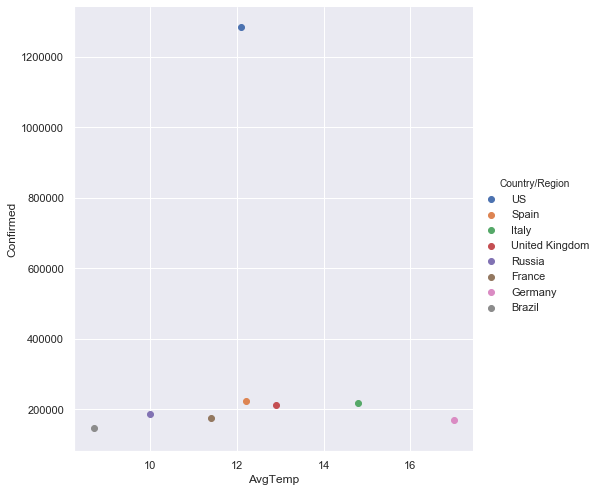

In [30]:
#Plotting the top most affected countries with x-axis as average temp and y-axis as confirmed cases
sns.set(style="darkgrid", color_codes=True)
sns.FacetGrid(new_raw_df, hue="Country/Region", size=7) \
   .map(plt.scatter, "AvgTemp", "Confirmed") \
   .add_legend()

### The above plot shows the top most affected countries based on the average temperature

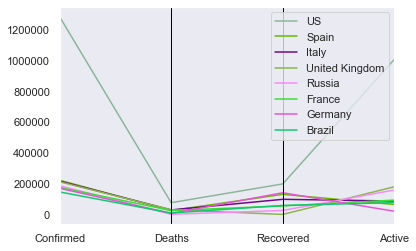

In [31]:
#Plotting for parallely comparing the confirmed, Deaths, Recovered and Active cases in top most affected countries
parallel_coordinates(new_raw_df.drop("AvgTemp", axis=1), "Country/Region")

#### Comparing the cases on top most affected countries with respect to:
    * Confirmed
    * Deaths
    * Recovered 
    * Active